# Animations

This notebook is trying to create animation for tracers through `matplotlib.animation` routine.

In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_1m_20020101_20131231_ptrc_T.nc'
#FName = '_data/RUN01_1m_20020101_20051231_ptrc_T.nc'
L=0; lev1 = np.arange(35, 100, 5)

In [4]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [5]:
ptrc_obj = nc.Dataset(FName)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

In [6]:
def init():
    plt.cla(); ax1=fig.gca()
    ax1.plot(1, 1,linewidth=0)
def movie_Ba(time_step):
    print('Frame '+str(time_step))
    plt.cla()
    ax=fig.gca()
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, ptrc_obj.variables['Ba'][time_step, 0, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
    #proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    
    CBar=proj.colorbar(CS, location='bottom', size='2%', pad='3%', ticks=lev1)
    CBar.set_label('nM', fontsize=10)
    CBar.ax.tick_params(axis='x', length=16)
    ax.set_title('Time: '+date_list[time_step].strftime("%Y-%m-%d"), fontsize=15)

Frame 0


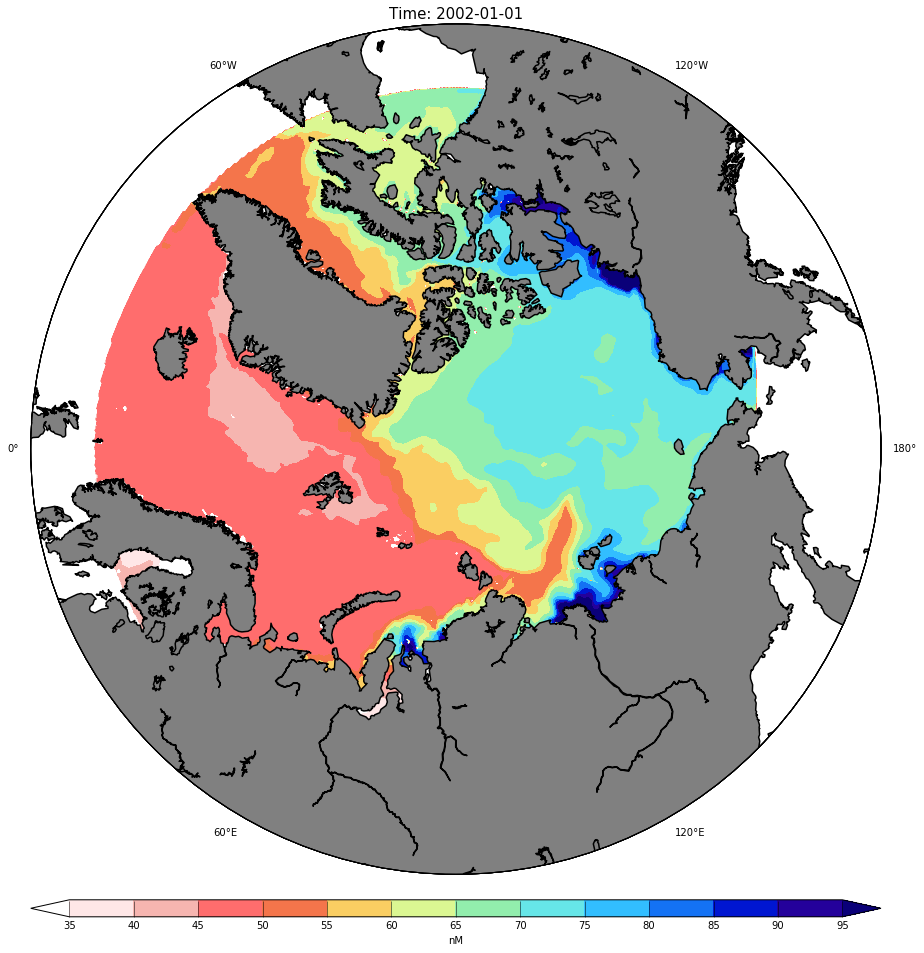

In [32]:
fig=plt.figure(figsize=(16, 16))
movie_Ba(0)

In [1]:
#fig=plt.figure(figsize=(14, 14))
#ani_obj=animation.FuncAnimation(fig, movie_Ba, range(144), init_func=init, interval=1250, blit=False)
#writer_obj=animation.FFMpegFileWriter()
#ani_obj.save('BARIUM_Monthly.mov', metadata={'author':'GEOTRACES CCAR Modelling Team'})

In [7]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')

#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

res_unit=3
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 

In [31]:
# Bad
#def ave_weight_dep(T, depth):
#    num = np.size(T, 0)
#    NLAT = np.size(T, 1)
#    NLON = np.size(T, 2)
#    OUT = np.zeros([num, NLAT, NLON])
#    for i in range(num):
#        OUT[i, :, :] = T[i, :, :]*depth[i]/np.mean(depth)
#    OUT = np.nanmean(OUT, 0)
#    return OUT

In [36]:
def plot_Ba(nav_lon, nav_lat, lev1, time_step, ax):
    print(time_step)
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    tempBa = ptrc_obj.variables['Ba'][time_step, :19, :, :]
    tempBa[tempBa==0]=np.nan
    CS=proj.contourf(x, y, np.nanmean(tempBa, 0), lev1, cmap=cm.GMT_haxby_r, extend='both')
    proj.contour(topox, topoy, topo_arctic, [1000], colors=('gray',), linewidths=1.5)
    #proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    ax.set_title(date_list[time_step].strftime("%Y-%m-%d"), fontsize=16)
    CBar=proj.colorbar(CS, location='bottom', size='3%', pad='3%', ticks=lev1)
    CBar.set_label('Dissolved Barium (nM)', fontsize=14)
    CBar.ax.tick_params(axis='x', length=16)

In [39]:
#for i in range(144):
#    fig = plt.figure(figsize=(10, 10))
#    ax = fig.gca()
#    plot_Ba(nav_lon, nav_lat, lev1, i, ax)
#    fig.savefig('BARIUM_'+str(i)+'.png', dpi=200, orientation='portrait', papertype='a4', format='png',
#                bbox_inches='tight', pad_inches=0.1)

In [6]:
MAT = scipy.io.loadmat('../../_data/Exchange/UV_current.mat')
vozocrtx0 = MAT['vozocrtx0'][:]
vozocrtx1 = MAT['vozocrtx1'][:]
vomecrty0 = MAT['vomecrty0'][:]
vomecrty1 = MAT['vomecrty1'][:]

In [21]:
def plot_uv(nav_lon, nav_lat, u, v, lev, ax):
    n=4
    sp = np.sqrt(u*u+v*v)
    u = u/sp
    v = v/sp
    proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y = proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, sp, lev, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.quiver(x[::n, ::n], y[::n, ::n], u[::n, ::n], v[::n, ::n], width=0.0015, scale=95)

In [25]:
#lev_sp = np.arange(0.025, 0.25, 0.025)
#for i in range(144):
#    print(i)
#    fig = plt.figure(figsize=(10, 10))
#    ax = fig.gca()
#    plot_uv(nav_lon, nav_lat, vozocrtx0[i, :, :], vomecrty0[i, :, :], lev_sp, ax)
#    ax.set_title('Time: '+date_list[i].strftime("%Y-%m-%d"), fontsize=15)
#    fig.savefig('Surface_UV_'+str(i)+'.png', dpi=200, orientation='portrait', papertype='a4', format='png',
#                bbox_inches='tight', pad_inches=0.1)